In [1]:
# PHASE 1 — INITIAL PREPROCESSING
# Project: Fraud Detection & Customer Segmentation (PaySim)

# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Basic configuration
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # Display floats with 2 decimals
plt.style.use('ggplot')  # Use ggplot style for plots

print("Libraries successfully loaded ✅")



Libraries successfully loaded ✅


In [2]:
# 1.1 Load the dataset
DATA_PATH = "bs140513_032310.csv"  # Adjust path if needed

try:
    df = pd.read_csv(DATA_PATH)
    print("Dataset successfully loaded ✅")
except FileNotFoundError:
    print("Error: File not found ❌")



Dataset successfully loaded ✅


In [3]:
# 1.2 Data Integrity Check

# Initial overview
print("\n--- Dataset Info ---")
print(df.info())

# Check for missing values 
print("\n--- Missing Values ---")
print(df.isnull().sum())

# Check for duplicates 
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Data types overview
print("\n--- Data Types ---")
print(df.dtypes)

# Dataset shape
print(f"\nThe dataset contains {df.shape[0]:,} rows and {df.shape[1]} columns.")




--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB
None

--- Missing Values ---
step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

Number of duplicate rows: 0

--- Data Types ---
step             int64
cust

In [4]:
# 1.3 Data type conversion (if needed)

# Check and convert selected columns to 'category' type
categorical_columns = ['customer', 'merchant', 'category', 'gender', 'zipcodeOri', 'zipMerchant', 'age']

for col in categorical_columns:
    df[col] = df[col].astype('category')

print("Categorical variable conversion completed successfully ✅")



Categorical variable conversion completed successfully ✅



--- General Statistics ---
           step    amount     fraud
count 594643.00 594643.00 594643.00
mean      94.99     37.89      0.01
std       51.05    111.40      0.11
min        0.00      0.00      0.00
25%       52.00     13.74      0.00
50%       97.00     26.90      0.00
75%      139.00     42.54      0.00
max      179.00   8329.96      1.00

--- Target Variable Distribution: 'fraud' ---
fraud
0   98.79
1    1.21
Name: proportion, dtype: float64


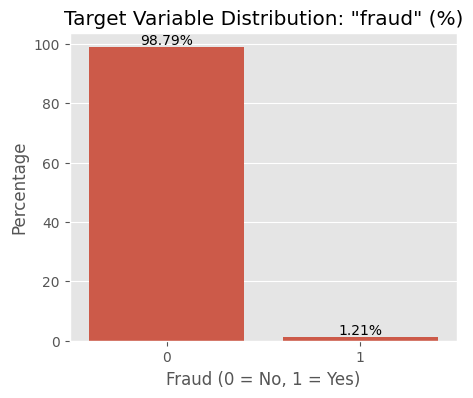

Basic exploration completed ✅


In [5]:
# 1.4 Basic Exploration

print("\n--- General Statistics ---")
print(df.describe())

# Distribution of the target variable 'fraud' 
print("\n--- Target Variable Distribution: 'fraud' ---")
fraud_dist = df['fraud'].value_counts(normalize=True) * 100
print(fraud_dist)

# Bar plot showing class imbalance
plt.figure(figsize=(5, 4))
ax = sns.barplot(x=fraud_dist.index, y=fraud_dist.values)
plt.title('Target Variable Distribution: "fraud" (%)')
plt.ylabel('Percentage')
plt.xlabel('Fraud (0 = No, 1 = Yes)')

# Annotate bars with percentage labels
for p in ax.patches:
    percentage = f'{p.get_height():.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)

plt.show()

print("Basic exploration completed ✅")



In [6]:
# PHASE 2 — ADVANCED EXPLORATORY DATA ANALYSIS (EDA)

import matplotlib.ticker as mtick  # For percentage formatting on plots

print(" Phase 2 — Advanced Exploration successfully started ✅")



 Phase 2 — Advanced Exploration successfully started ✅


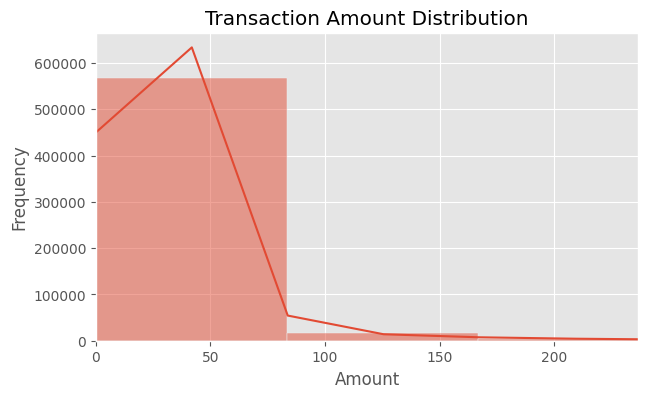

In [7]:
# Overall transaction amount distribution 
plt.figure(figsize=(7, 4))
sns.histplot(df['amount'], bins=100, kde=True)

plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')

# Limit x-axis to the 99th percentile to avoid distortion from extreme outliers
plt.xlim(0, df['amount'].quantile(0.99))
plt.show()


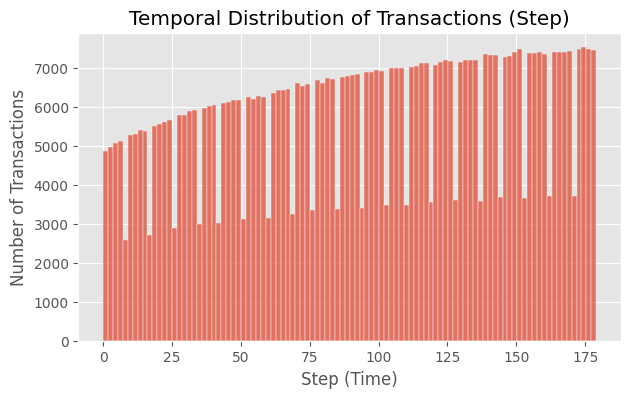

In [8]:
# Temporal distribution of transactions (step) 
plt.figure(figsize=(7, 4))
sns.histplot(df['step'], bins=100)

plt.title('Temporal Distribution of Transactions (Step)')
plt.xlabel('Step (Time)')
plt.ylabel('Number of Transactions')
plt.show()


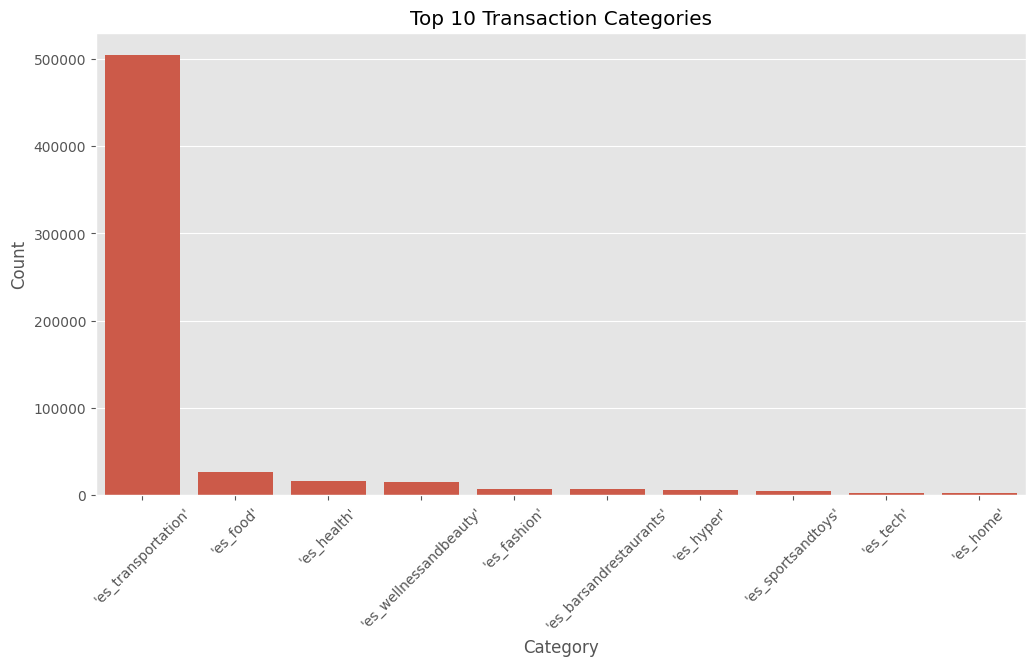


--- Frequency of All Transaction Categories ---
category
'es_transportation'        505119
'es_food'                   26254
'es_health'                 16133
'es_wellnessandbeauty'      15086
'es_fashion'                 6454
'es_barsandrestaurants'      6373
'es_hyper'                   6098
'es_sportsandtoys'           4002
'es_tech'                    2370
'es_home'                    1986
'es_hotelservices'           1744
'es_otherservices'            912
'es_contents'                 885
'es_travel'                   728
'es_leisure'                  499
Name: count, dtype: int64


In [9]:
# 2.1 Distribution of relevant categorical variables (enhanced) 

# Ensure 'category' column is not encoded (still in text or categorical form)
top_categories = df['category'].value_counts().nlargest(10).index

# Plot the top 10 transaction categories
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['category'].isin(top_categories)], x='category', order=top_categories)

plt.title('Top 10 Transaction Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Full summary table of all categories
print("\n--- Frequency of All Transaction Categories ---")
print(df['category'].value_counts())





--- Distribution of gender ---
gender
'F'    324565
'M'    268385
'E'      1178
'U'       515
Name: count, dtype: int64


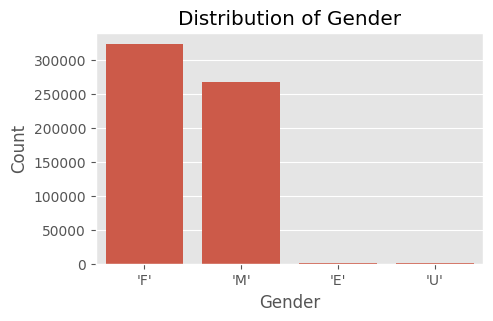


--- Distribution of age ---
age
'2'    187310
'3'    147131
'4'    109025
'5'     62642
'1'     58131
'6'     26774
'0'      2452
'U'      1178
Name: count, dtype: int64


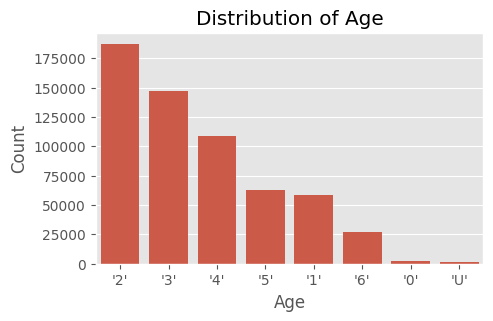

In [10]:
# Distribution of 'age' and 'gender' with chart and table 
for var in ['gender', 'age']:
    print(f"\n--- Distribution of {var} ---")
    print(df[var].value_counts())

    plt.figure(figsize=(5, 3))
    sns.countplot(data=df, x=var, order=df[var].value_counts().index)
    plt.title(f'Distribution of {var.capitalize()}')
    plt.xlabel(var.capitalize())
    plt.ylabel('Count')
    plt.show()


In [11]:
# Percentage distribution of the target variable 'fraud' 
fraud_dist = df['fraud'].value_counts(normalize=True) * 100

print("\n--- Percentage of Fraudulent Transactions ---")
print(fraud_dist)



--- Percentage of Fraudulent Transactions ---
fraud
0   98.79
1    1.21
Name: proportion, dtype: float64



--- 'Amount' Statistics by Fraud Label ---
          count   mean    std  min    25%    50%    75%     max
fraud                                                          
0     587443.00  31.85  31.47 0.00  13.59  26.61  41.89 2144.86
1       7200.00 530.93 835.59 0.03 159.98 319.18 548.98 8329.96


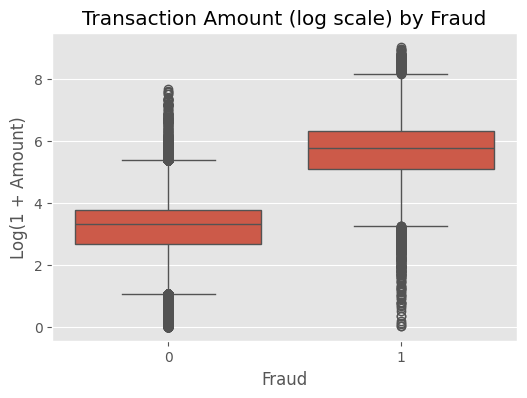

✔ Logarithmic scale was used to better visualize the distribution of transaction amounts.
✔ Fraudulent transactions (fraud = 1) show significantly higher amounts.
✔ They also have greater dispersion and more extreme values.
✔ Normal transactions (fraud = 0) are much lower and more concentrated.
✔ This difference will be leveraged when engineering features for the model.


In [12]:
# Transaction amount statistics grouped by fraud status 
print("\n--- 'Amount' Statistics by Fraud Label ---")
print(df.groupby('fraud')['amount'].describe())

# Boxplot with logarithmic scale
plt.figure(figsize=(6, 4))
sns.boxplot(x='fraud', y=np.log1p(df['amount']), data=df)

plt.title('Transaction Amount (log scale) by Fraud')
plt.xlabel('Fraud')
plt.ylabel('Log(1 + Amount)')
plt.show()

# - Interpretation notes -
print("✔ Logarithmic scale was used to better visualize the distribution of transaction amounts.")
print("✔ Fraudulent transactions (fraud = 1) show significantly higher amounts.")
print("✔ They also have greater dispersion and more extreme values.")
print("✔ Normal transactions (fraud = 0) are much lower and more concentrated.")
print("✔ This difference will be leveraged when engineering features for the model.")


<Figure size 1200x800 with 0 Axes>

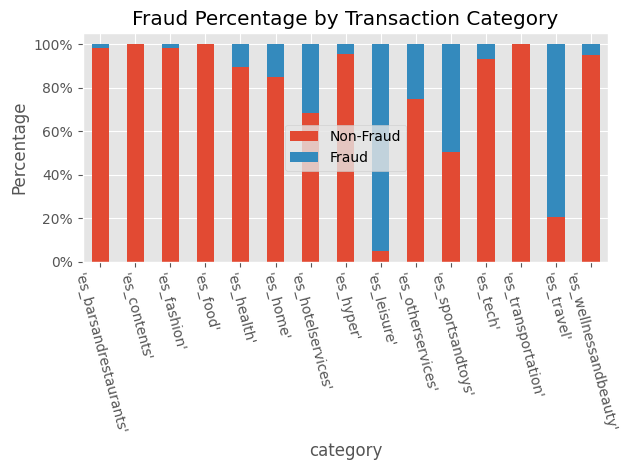

In [13]:
import matplotlib.ticker as mtick

# Fraud percentage per transaction category
plt.figure(figsize=(12, 8))

# Create normalized crosstab: % of fraud per category
fraud_category = pd.crosstab(df['category'], df['fraud'], normalize='index') * 100

# Stacked bar chart
fraud_category.plot(kind='bar', stacked=True)

plt.title('Fraud Percentage by Transaction Category')
plt.ylabel('Percentage')
plt.legend(['Non-Fraud', 'Fraud'])
plt.xticks(rotation=-75)

# Format y-axis as percentage
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.tight_layout()
plt.show()



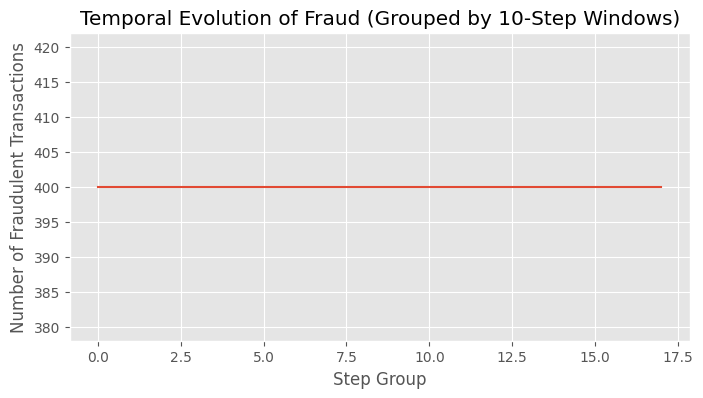

In [14]:
# Grouping by time window of 10 steps 
df['step_group'] = df['step'] // 10  # Group every 10 steps (roughly every 10 hours)

# Plot total fraud cases per time window
plt.figure(figsize=(8, 4))
sns.lineplot(data=df.groupby('step_group')['fraud'].sum())

plt.title('Temporal Evolution of Fraud (Grouped by 10-Step Windows)')
plt.xlabel('Step Group')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()


In [15]:
# PHASE 3 — PROFESSIONAL FEATURE ENGINEERING

# 3.1 — Average, maximum, and standard deviation of amount per customer 
agg_amount = df.groupby('customer', observed=False)['amount'].agg(['mean', 'max', 'std']).rename(columns={
    'mean': 'avg_amount_by_customer',
    'max': 'max_amount_by_customer',
    'std': 'std_amount_by_customer'
})

# Merge aggregated features back to main DataFrame
df = df.merge(agg_amount, how='left', on='customer')

print("Customer-level transaction amount features created successfully ✅")


Customer-level transaction amount features created successfully ✅


In [16]:
# Create 'transaction_count' per customer if not already present 
if 'transaction_count' not in df.columns:
    trans_count = df.groupby('customer', observed=False)['amount'].count().rename('transaction_count')
    df = df.merge(trans_count, how='left', on='customer')
    print("✅ 'transaction_count' variable created")
else:
    print("⚠️ 'transaction_count' variable already exists, not recreated")

✅ 'transaction_count' variable created


In [17]:
#  Create 'avg_step_diff' (average time between transactions) per customer 
if 'avg_step_diff' not in df.columns:
    step_diff = df.groupby('customer', observed=False)['step'] \
                  .apply(lambda x: x.sort_values().diff().mean()) \
                  .rename('avg_step_diff')
    df = df.merge(step_diff, how='left', on='customer')
    print("✅ 'avg_step_diff' variable created")
else:
    print("⚠️ 'avg_step_diff' variable already exists, not recreated")

✅ 'avg_step_diff' variable created


In [18]:
# Create 'unique_categories_by_customer' (number of distinct transaction types) 
if 'unique_categories_by_customer' not in df.columns:
    category_count = df.groupby('customer', observed=False)['category'] \
                       .nunique() \
                       .rename('unique_categories_by_customer')
    df = df.merge(category_count, how='left', on='customer')
    print("✅ 'unique_categories_by_customer' variable created")
else:
    print("⚠️ 'unique_categories_by_customer' variable already exists, not recreated")


✅ 'unique_categories_by_customer' variable created


In [19]:
# Create log-transformed 'amount' variable 
if 'log_amount' not in df.columns:
    df['log_amount'] = np.log1p(df['amount'])  # log(1 + amount) to handle zero values
    print("✅ 'log_amount' variable created")
else:
    print("⚠️ 'log_amount' variable already exists, not recreated")


✅ 'log_amount' variable created


In [20]:
# Simple label encoding for categorical variables

df['gender'] = df['gender'].astype('category').cat.codes
df['category'] = df['category'].astype('category').cat.codes
df['age'] = df['age'].astype('category').cat.codes

print("✅ Categorical variable encoding completed")


✅ Categorical variable encoding completed


In [21]:
print("\n=== Diagnostic of Newly Engineered Features ===")

features = [
    'avg_amount_by_customer',
    'max_amount_by_customer',
    'std_amount_by_customer',
    'transaction_count',
    'avg_step_diff',
    'unique_categories_by_customer',
    'log_amount'
]

print(df[features].describe())



=== Diagnostic of Newly Engineered Features ===
       avg_amount_by_customer  max_amount_by_customer  std_amount_by_customer  \
count               594643.00               594643.00               594643.00   
mean                    37.89                  479.19                   55.30   
std                     30.04                  881.46                   92.74   
min                     23.37                   64.07                   15.76   
25%                     29.95                  162.11                   23.77   
50%                     32.03                  222.59                   29.27   
75%                     35.34                  340.10                   40.17   
max                    838.16                 8329.96                 1920.57   

       transaction_count  avg_step_diff  unique_categories_by_customer  \
count          594643.00      594643.00                      594643.00   
mean              157.27           1.21                           7.75   

In [22]:
# PHASE 4 — SEGMENTATION (CLUSTERING)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print(" Phase 4 — Clustering successfully started ✅ ")


 Phase 4 — Clustering successfully started ✅ 


In [23]:
# Define features to use for clustering
features_for_clustering = [
    'avg_amount_by_customer',
    'max_amount_by_customer',
    'std_amount_by_customer',
    'transaction_count',
    'avg_step_diff',
    'unique_categories_by_customer'
]

# Verify that all required columns are present
missing = [f for f in features_for_clustering if f not in df.columns]
if missing:
    print(f"❌ Missing required columns for clustering: {missing}")
else:
    print("✅ All required features for clustering are available")


✅ All required features for clustering are available


In [24]:
# Scale the selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features_for_clustering])

print("✅ Features scaled successfully")


✅ Features scaled successfully


=== Elbow Method Results ===
k = 1 --> WCSS = 3567858.00
k = 2 --> WCSS = 2305552.29
k = 3 --> WCSS = 1814420.30
k = 4 --> WCSS = 1469034.43
k = 5 --> WCSS = 1189167.92
k = 6 --> WCSS = 934338.00
k = 7 --> WCSS = 852669.78
k = 8 --> WCSS = 779814.86
k = 9 --> WCSS = 706296.26
k = 10 --> WCSS = 656920.58


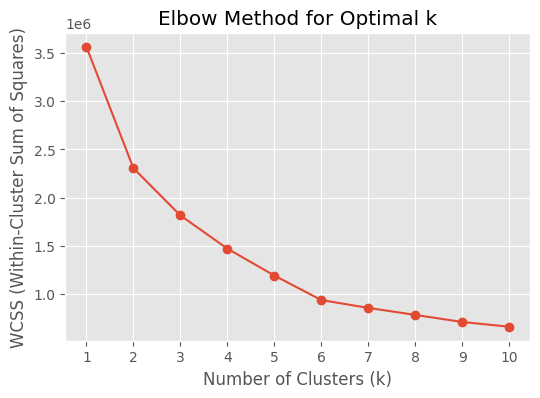

In [25]:
# Elbow Method to determine optimal number of clusters
wcss = []
K = range(1, 11)

print("=== Elbow Method Results ===")

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia = kmeans.inertia_
    wcss.append(inertia)
    print(f"k = {k} --> WCSS = {inertia:.2f}")

# === Plot the elbow curve ===
plt.figure(figsize=(6, 4))
plt.plot(K, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(K)
plt.show()


In [26]:
# Final KMeans clustering with selected k
k_optimal = 4  # Adjust based on elbow method result

kmeans_final = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df['cluster'] = kmeans_final.fit_predict(X_scaled)

print(f"✅ Clustering successfully completed with k = {k_optimal}")
print(df['cluster'].value_counts())


✅ Clustering successfully completed with k = 4
cluster
0    475994
2     93925
1     21634
3      3090
Name: count, dtype: int64


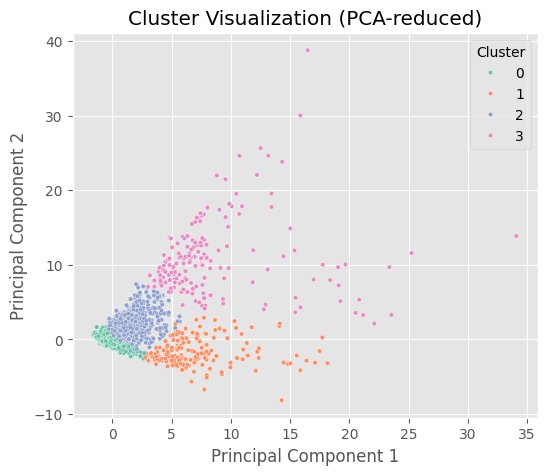

In [27]:
# Dimensionality reduction to 2D using PCA for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot of clusters in PCA-reduced space
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='Set2', s=10)

plt.title('Cluster Visualization (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


In [28]:
# Cluster Profiling
print("\n--- Cluster Characterization ---")
print(df.groupby('cluster')[features_for_clustering].mean())




--- Cluster Characterization ---
         avg_amount_by_customer  max_amount_by_customer  \
cluster                                                   
0                         31.99                  275.17   
1                        126.41                 4449.21   
2                         42.92                  573.86   
3                        174.13                 1234.48   

         std_amount_by_customer  transaction_count  avg_step_diff  \
cluster                                                             
0                         32.94             168.16           1.06   
1                        447.30             140.46           1.39   
2                         70.55             110.42           1.66   
3                        291.70              21.66           8.78   

         unique_categories_by_customer  
cluster                                 
0                                 7.45  
1                                10.61  
2                               

In [29]:
# PHASE 5 — HANDLING CLASS IMBALANCE

from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split

print(" Phase 5 — Imbalance Handling successfully started ✅")



 Phase 5 — Imbalance Handling successfully started ✅


In [30]:
# Original class distribution
print("\n--- Original distribution of the 'fraud' variable ---")
print(df['fraud'].value_counts())  # Absolute counts
print(df['fraud'].value_counts(normalize=True) * 100)  # Percentages




--- Original distribution of the 'fraud' variable ---
fraud
0    587443
1      7200
Name: count, dtype: int64
fraud
0   98.79
1    1.21
Name: proportion, dtype: float64


In [31]:
# Features to be used for modeling
features_model = features_for_clustering + ['log_amount', 'cluster']

# Define X (features) and y (target) 
X = df[features_model]
y = df['fraud']

# Train/Test split with stratification 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\n✅ Train/Test split completed successfully:")
print(f"Train size: {X_train.shape[0]} samples")
print(f"Test size: {X_test.shape[0]} samples")



✅ Train/Test split completed successfully:
Train size: 416250 samples
Test size: 178393 samples


In [32]:
# Apply SMOTE only to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\n✅ SMOTE applied successfully")

# Class distribution after applying SMOTE
print("\n--- Class distribution after SMOTE ---")
print(Counter(y_train_smote))



✅ SMOTE applied successfully

--- Class distribution after SMOTE ---
Counter({0: 411210, 1: 411210})


In [33]:
# PHASE 6 — CLASSIFICATION MODELS

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(" Phase 6 — Predictive Modeling successfully started ✅ ")


 Phase 6 — Predictive Modeling successfully started ✅ 


In [34]:
# Define training sets for both approaches (with and without SMOTE)
X_train_bal = X_train_smote
y_train_bal = y_train_smote

X_train_nobal = X_train
y_train_nobal = y_train

print("✅ Datasets successfully prepared for both approaches (SMOTE / Original)")


✅ Datasets successfully prepared for both approaches (SMOTE / Original)


In [35]:
# Logistic Regression (with class balancing) 
lr = LogisticRegression(
    max_iter=500,
    class_weight='balanced',
    random_state=42
)

#  Lightweight Random Forest 
rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=6,
    class_weight='balanced',
    random_state=42
)

# Lightweight XGBoost 
xgb = XGBClassifier(
    n_estimators=50,
    max_depth=6,
    scale_pos_weight=(y_train_nobal.value_counts()[0] / y_train_nobal.value_counts()[1]),
    eval_metric='logloss',
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

print("✅ Lightweight models configured successfully")



✅ Lightweight models configured successfully


In [36]:
# Stratified K-Fold cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print("✅ Stratified K-Fold initialized")


✅ Stratified K-Fold initialized


In [37]:
from sklearn.preprocessing import StandardScaler

# Scale features for Logistic Regression (no SMOTE)
scaler_lr = StandardScaler()
X_train_nobal_scaled = scaler_lr.fit_transform(X_train_nobal)

# Logistic Regression with original data (no SMOTE)
print("\n=== Logistic Regression (no SMOTE) ===")
scores_lr = cross_val_score(lr, X_train_nobal_scaled, y_train_nobal, cv=cv, scoring='roc_auc')

print(f"Average ROC-AUC: {scores_lr.mean():.4f} | Std: {scores_lr.std():.4f}")





=== Logistic Regression (no SMOTE) ===
Average ROC-AUC: 0.9791 | Std: 0.0025


In [38]:
# Random Forest with original data (no SMOTE)
print("\n=== Random Forest (no SMOTE) ===")
scores_rf = cross_val_score(rf, X_train_nobal, y_train_nobal, cv=cv, scoring='roc_auc')

print(f"Average ROC-AUC: {scores_rf.mean():.4f} | Std: {scores_rf.std():.4f}")




=== Random Forest (no SMOTE) ===
Average ROC-AUC: 0.9855 | Std: 0.0018


In [39]:
# XGBoost with original data (no SMOTE)
print("\n=== XGBoost (no SMOTE) ===")
scores_xgb = cross_val_score(xgb, X_train_nobal, y_train_nobal, cv=cv, scoring='roc_auc')

print(f"Average ROC-AUC: {scores_xgb.mean():.4f} | Std: {scores_xgb.std():.4f}")




=== XGBoost (no SMOTE) ===
Average ROC-AUC: 0.9849 | Std: 0.0021


In [40]:
# Random Forest with SMOTE-balanced training set 
print("\n=== Random Forest (with SMOTE) ===")
scores_rf_smote = cross_val_score(rf, X_train_bal, y_train_bal, cv=cv, scoring='roc_auc')

print(f"Average ROC-AUC: {scores_rf_smote.mean():.4f} | Std: {scores_rf_smote.std():.4f}")


=== Random Forest (with SMOTE) ===
Average ROC-AUC: 0.9896 | Std: 0.0003


In [41]:
# XGBoost with SMOTE-balanced training set
print("\n=== XGBoost (with SMOTE) ===")
scores_xgb_smote = cross_val_score(xgb, X_train_bal, y_train_bal, cv=cv, scoring='roc_auc')
print(f"Average ROC-AUC: {scores_xgb_smote.mean():.4f} | Std: {scores_xgb_smote.std():.4f}")



=== XGBoost (with SMOTE) ===
Average ROC-AUC: 0.9963 | Std: 0.0001


In [42]:
# PHASE 7 — INTERPRETABILITY WITH SHAP
import shap
print(" Phase 7 — SHAP Explainability successfully initialized ✅")


=== Phase 7 — SHAP Explainability successfully initialized ✅ ===


In [43]:
# Fit the model if you haven't already
xgb.fit(X_train_bal, y_train_bal)

# Then initialize the SHAP TreeExplainer:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

print("✅ SHAP TreeExplainer initialized successfully")




✅ SHAP TreeExplainer initialized successfully


In [44]:
# Global Feature Importance (Bar Plot) 
explainer = shap.TreeExplainer(xgb)
shap_values = explainer(X_test)
print(type(shap_values))




<class 'shap._explanation.Explanation'>


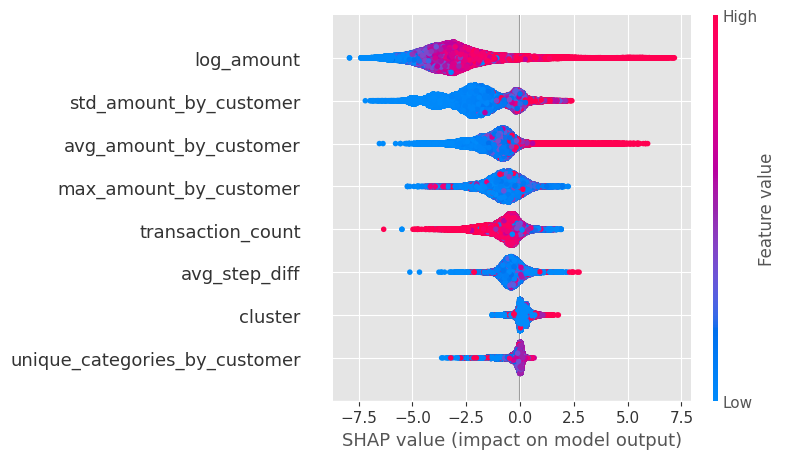

✅ SHAP summary plot generated


In [45]:
# SHAP Summary Plot 
shap.summary_plot(shap_values, X_test, max_display=10)
print("✅ SHAP summary plot generated")


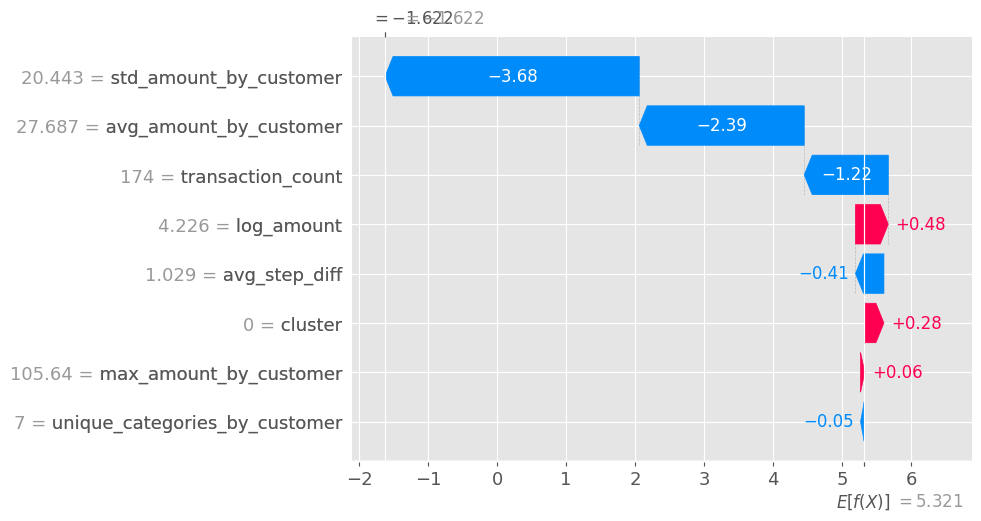

✅ Local interpretation for prediction #0 generated


In [46]:
# Local explanation for a specific prediction
sample_index = 0  # Change this to explore other instances

shap.plots.waterfall(shap_values[sample_index])
print(f"✅ Local interpretation for prediction #{sample_index} generated")



In [47]:
# PHASE 8 — FINAL RESULTS AND EXPORT

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import joblib

print("=== Phase 8 — Final Evaluation successfully started ✅ ===")


=== Phase 8 — Final Evaluation successfully started ✅ ===


In [48]:
# Train the RandomForestClassifier with the original training set
rf.fit(X_train_nobal, y_train_nobal)

# Generate predictions on the test set
# Random Forest predictions
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# XGBoost predictions (assumes xgb is already fitted)
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

print("✅ Predictions generated successfully")



✅ Predictions generated successfully


In [49]:
print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf, digits=4))
print("ROC-AUC RF:", roc_auc_score(y_test, y_proba_rf))

print("\n=== XGBoost ===")
print(classification_report(y_test, y_pred_xgb, digits=4))
print("ROC-AUC XGB:", roc_auc_score(y_test, y_proba_xgb))



=== Random Forest ===
              precision    recall  f1-score   support

           0     0.9991    0.9678    0.9832    176233
           1     0.2604    0.9259    0.4065      2160

    accuracy                         0.9673    178393
   macro avg     0.6297    0.9468    0.6948    178393
weighted avg     0.9901    0.9673    0.9762    178393

ROC-AUC RF: 0.9841465875037907

=== XGBoost ===
              precision    recall  f1-score   support

           0     0.9994    0.8220    0.9020    176233
           1     0.0620    0.9593    0.1164      2160

    accuracy                         0.8236    178393
   macro avg     0.5307    0.8906    0.5092    178393
weighted avg     0.9880    0.8236    0.8925    178393

ROC-AUC XGB: 0.9778715023419123


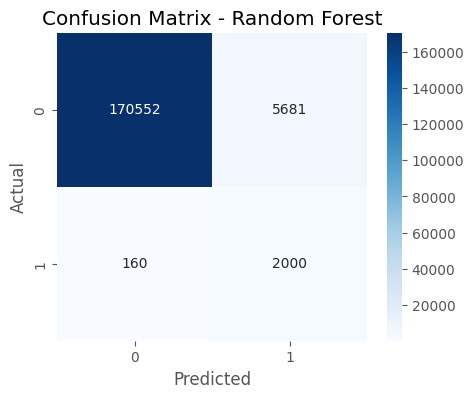

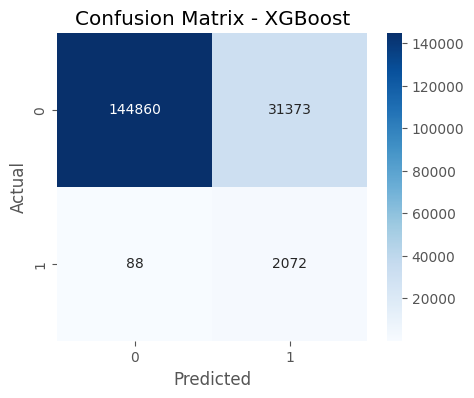

In [50]:
# Confusion Matrix — Random Forest 
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion Matrix — XGBoost
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


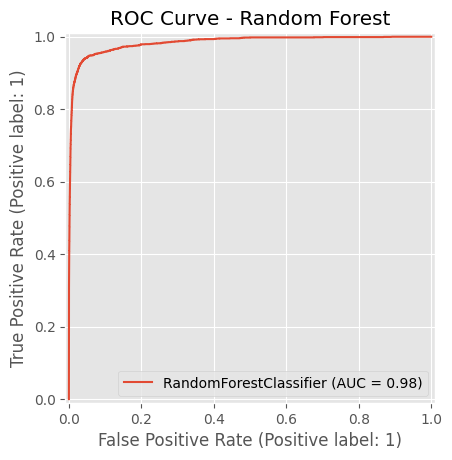

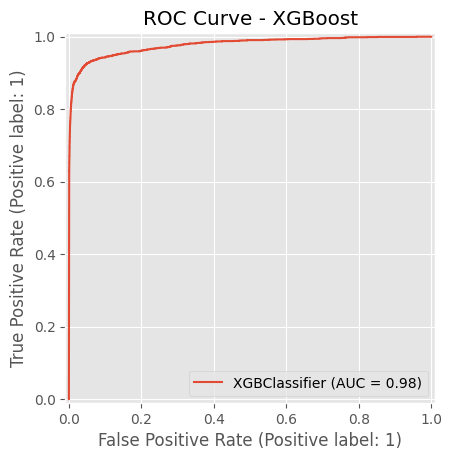

In [51]:
# ROC Curve — Random Forest
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("ROC Curve - Random Forest")
plt.show()

# ROC Curve — XGBoost
RocCurveDisplay.from_estimator(xgb, X_test, y_test)
plt.title("ROC Curve - XGBoost")
plt.show()


In [52]:
# Export trained XGBoost model (customizable filename)
joblib.dump(xgb, "modelo_xgboost_fraud_detection.joblib")
print("✅ Model successfully exported as 'modelo_xgboost_fraud_detection.joblib'")


✅ Model successfully exported as 'modelo_xgboost_fraud_detection.joblib'
